# Linear Regression
1.About this Sprint
* The purpose of this Sprint
* Understanding linear regression through scratch
* Get used to object-oriented implementation
Allow formulas to be incorporated into code

## How to learn
After implementing linear regression with scratch, we will train and verify.

## Scratch Linear Regression
We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.

The template is prepared below. Add some code to this ScratchLinearRegression class.



In [39]:
import numpy as np
import pandas as pd
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, 
        the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])
        
        # Prepare theta for hypotheis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))
        
        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
                
        if self.verbose:
            #Output learning process when verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))
        pass
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        return np.dot(X, self.theta.T)
    
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function
        """
        y_hyp = np.dot(X, self.theta.T)
        return y_hyp
    
    def _gradient_descent(self, X, y, y_hyp):
        """
        Update new theta j in the steepest decent method
        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            Training data
        y: ndarray, shape (n_samples,)
            Correct answer value of training data
        y_hyp: ndarray, shape (n_samples, 1)
        Returns
        -------
        update_theta: ndarray, shape (n_features, 1)
          New theta value
        """
        n_samples = X.shape[0]
        update_theta = self.theta - (self.lr * np.dot((y_hyp - y), X) / n_samples)
        return update_theta
    
    def _loss_function(self, y_pred, y):
        """
        Calculation of objective function.
        Parameters
        ----------
        y_pred : The following forms of ndarray, shape (n_samples,)
          Estimated value
        y : The following forms of ndarray, shape (n_samples,)
          Correct answer value
        Returns
        ----------
        loss: numpy.float
          Result of the loss function
        """
        loss = np.mean((y_pred - y) ** 2)
        return loss
        

def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : The following forms of ndarray, shape (n_samples,)
      Estimated value
    y : The following forms of ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    n_samples = y.shape[0]
    mse = np.mean((y_pred - y)[1:] ** 2)
    return mse

# „Äêproblem1„ÄëHypothetical function



Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template
_linear_hypothesis

# „Äêproblem2„ÄëSteepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.
def _gradient_descent

# „Äêproblem 3„ÄëEstimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.
def fit(self, X, y, X_val=None, y_val=None), def predict(self, X)

# „Äêproblem 4„ÄëMean squared error

Create a function of mean square error (MSE) used as an index value for linear regression.

Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.

def MSE(y_pred, y)

# „Äêproblem 5„ÄëObjective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.
def _loss_function(self, y_pred, y)

In [40]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape


(5, 2)

In [41]:
# Let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [42]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [43]:
theta = slr.fit(X, y)

Loss: [1.50733235e+02 7.69771772e+00 5.77807092e-01 2.22256815e-01
 2.03367856e-01 2.01241482e-01 1.99956678e-01 1.98721032e-01
 1.97495059e-01 1.96276752e-01 1.95065965e-01 1.93862648e-01
 1.92666753e-01 1.91478236e-01 1.90297050e-01 1.89123151e-01
 1.87956493e-01 1.86797033e-01 1.85644724e-01 1.84499524e-01
 1.83361389e-01 1.82230274e-01 1.81106137e-01 1.79988934e-01
 1.78878624e-01 1.77775162e-01 1.76678508e-01 1.75588618e-01
 1.74505452e-01 1.73428968e-01 1.72359124e-01 1.71295880e-01
 1.70239194e-01 1.69189028e-01 1.68145339e-01 1.67108089e-01
 1.66077237e-01 1.65052744e-01 1.64034572e-01 1.63022680e-01
 1.62017030e-01 1.61017584e-01 1.60024303e-01 1.59037149e-01
 1.58056086e-01 1.57081074e-01 1.56112076e-01 1.55149056e-01
 1.54191977e-01 1.53240802e-01 1.52295494e-01 1.51356018e-01
 1.50422337e-01 1.49494416e-01 1.48572219e-01 1.47655711e-01
 1.46744857e-01 1.45839621e-01 1.44939970e-01 1.44045868e-01
 1.43157282e-01 1.42274177e-01 1.41396520e-01 1.40524277e-01
 1.39657415e-01 1.

In [44]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.57269322, 10.36161897, 16.15054472, 21.93947047, 27.72839622])

In [45]:
MSE(y,slr_predict)

np.float64(0.0577161073667746)

# Problem 6 Learning and Estimation
Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

In [17]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [20]:
X[:5]

array([[1710],
       [1262],
       [1786],
       [1717],
       [2198]])

In [21]:
y[:5]

array([208500, 181500, 223500, 140000, 250000])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

0              1              2              3              4    \
0  101879.948378  187968.806082  113329.105924  174097.711362  103641.357231   
1   60000.000000  185900.000000  119000.000000  163990.000000  138000.000000   

             5              6              7              8              9    \
0  172446.390562  211968.001708  159125.736109   98357.130671  235416.757067   
1  174000.000000  239000.000000  164500.000000  129500.000000  269790.000000   

   ...            355            356            357            358  \
0  ...  185326.692802  100779.067844  393283.025543  100118.539524   
1  ...  140000.000000   91000.000000  381000.000000   76000.000000   

             359            360           361            362            363  \
0  150759.044056  112228.225391  130062.49003  299598.092159  131823.898883   
1  150000.000000  149900.000000  145000.00000  342643.000000  145000.000000   

             364  
0  172996.830829  
1  175000.000000  

[2 rows x 365 columns]

In [46]:
MSE(y_house_predict, y_test)

np.float64(1777586601.9638963)

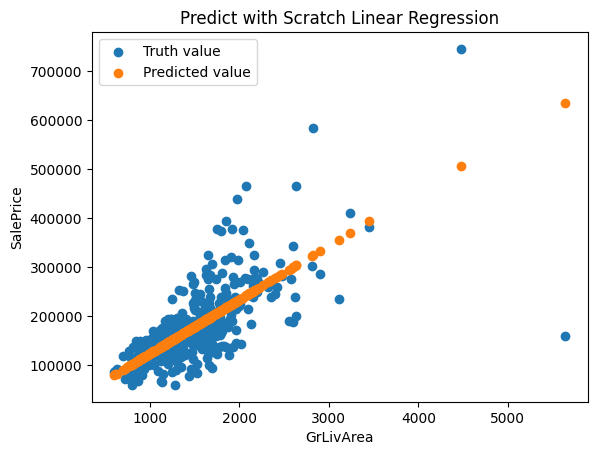

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, y_house_predict, label='Predicted value')
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predicted value', 'Truth value'])

0              1              2              3    \
Predicted value  101884.34687  187976.921256  113333.998707  174105.227685   
Truth value       60000.00000  185900.000000  119000.000000  163990.000000   

                           4              5             6              7    \
Predicted value  103645.831768  172453.835593  211977.15299  159132.606053   
Truth value      138000.000000  174000.000000  239000.00000  164500.000000   

                           8              9    ...            355  \
Predicted value   98361.377075  235426.920694  ...  185334.693909   
Truth value      129500.000000  269790.000000  ...  140000.000000   

                           356            357            358            359  \
Predicted value  100783.418809  393300.004669  100122.861972  150765.552788   
Truth value       91000.000000  381000.000000   76000.000000  150000.000000   

                           360            361            362            363  \
Predicted value  112233.070646  130068.105237  299611.026661  131829.590135   
Truth value      149900.000000  145000.000000  342643.000000  145000.000000   

                           364  
Predicted value  173004.299624  
Truth value      175000.000000  

[2 rows x 365 columns]

In [27]:
mean_squared_error(y_test, lr_predict)

3331188890.504416

### Problem 7 Plotting the learning curve


Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.

In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.



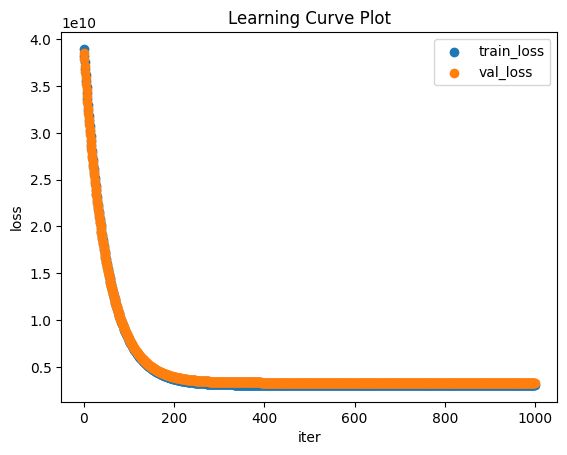

In [28]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()

### „Äêproblem 8„Äë(Advance task) Removal of bias term

---



In [29]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_predict = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_predict, y_test], index=['Predict value', 'Truth value'])

0              1              2              3    \
Predict value -78608.902306    7479.955405  -67159.744759   -6391.139316   
Truth value    60000.000000  185900.000000  119000.000000  163990.000000   

                         4              5              6             7    \
Predict value  -76847.493453   -8042.460116   31479.151033  -21363.11457   
Truth value    138000.000000  174000.000000  239000.000000  164500.00000   

                         8              9    ...            355          356  \
Predict value  -82131.720013   54927.906394  ...    4837.842125 -79709.78284   
Truth value    129500.000000  269790.000000  ...  140000.000000  91000.00000   

                         357          358            359            360  \
Predict value  212794.174883 -80370.31116  -29729.806624  -68260.625292   
Truth value    381000.000000  76000.00000  150000.000000  149900.000000   

                         361            362            363            364  
Predict value  -50426.360651  119109.241491  -48664.951798   -7492.019849  
Truth value    145000.000000  342643.000000  145000.000000  175000.000000  

[2 rows x 365 columns]

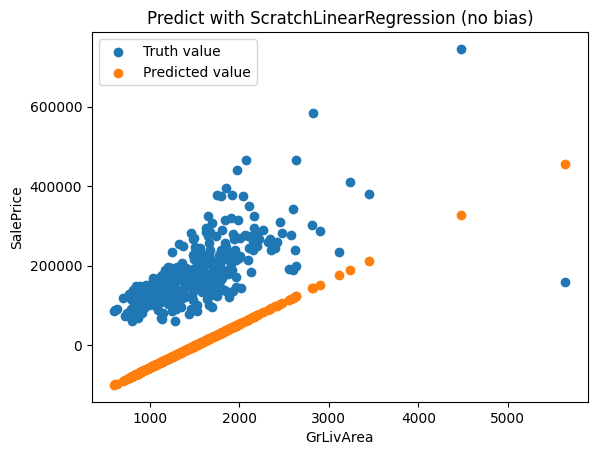

In [30]:
plt.title('Predict with ScratchLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_predict, label='Predicted value')
plt.legend()
plt.show()

The bias term is used to allow models to represent patterns that do not pass through the origin. In this problem, when there is no bias term, the predicted sale price can be negative and most predicted values is smaller than expected values. The bias term now shifts the sale price up on y-axis.

### „Äêproblem 9„Äë(Advance task) Multidimensional feature quantity

---



In [31]:
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

0              1              2              3              4    \
0  214913.949273  157337.372862  295036.416416  153789.034576  110146.130929   
1  246578.000000  168500.000000  299800.000000  122000.000000  108000.000000   

             5              6              7              8              9    \
0  202234.426754  255172.936496  255584.846537  218672.365233  133779.403588   
1  180000.000000  266000.000000  255000.000000  176500.000000  141000.000000   

   ...            355            356            357            358  \
0  ...  149760.346471  139383.980867  286832.556091  143333.242933   
1  ...  147500.000000  132000.000000  315750.000000  178000.000000   

             359            360            361            362            363  \
0  218227.408532  131852.040032  103317.862422  134882.947063  195533.739863   
1  233170.000000  102000.000000  109000.000000  127500.000000  180000.000000   

             364  
0  197194.953929  
1  140000.000000  

[2 rows x 365 columns]

In [33]:
MSE(y_house_predict, y_test)

NameError: name 'MSE' is not defined

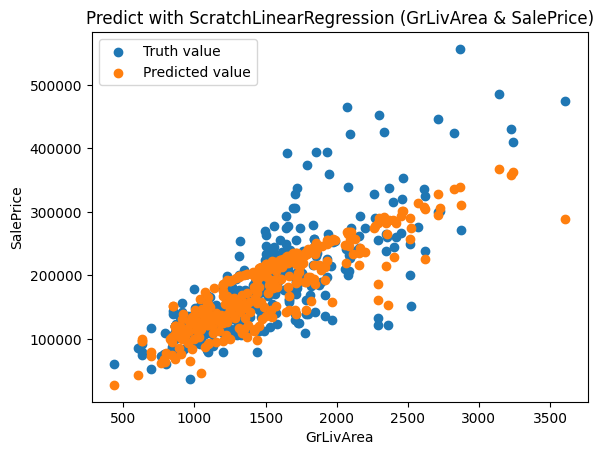

 -----------------------------------------------------------------


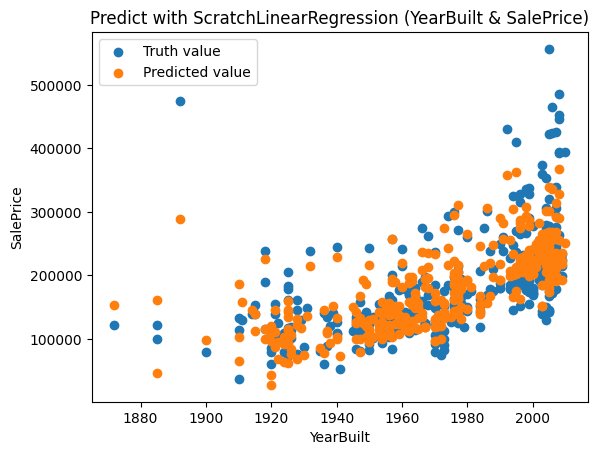

In [34]:
plt.title('Predict with ScratchLinearRegression (GrLivArea & SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 0], y_test, label='Truth value')
plt.scatter(X_test[:, 0], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

print(" -----------------------------------------------------------------")


plt.title('Predict with ScratchLinearRegression (YearBuilt & SalePrice)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 1], y_test, label='Truth value')
plt.scatter(X_test[:, 1], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

### „Äêproblem 10„Äë(Advance task) Derivation of update formula

---



The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]\$

To optimize ùúÉ, we consider the following equation using the steepest descent descent method. This equation calculates the derivative of the objectives function J with respect to ùúÉ (the slope of J), and updates ùúÉ by the slope x learning rate.


$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\\
$

$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$


Hence,

$
\frac{\partial J}{\partial x} = \frac{1}{2m} \frac{\partial  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2}{\partial x}
$

$
\frac{\partial J}{\partial x} = \frac{1}{2m} \sum_{i=1}^{m} 2(h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (h_\theta(x^{(i)}) - y^{(i)})}{\partial \theta_j}
$

$
\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (\theta_j x_j^{(i)} - y^{(i)})}{\partial \theta_j}
$

$
\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$

Therefore, 

$
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$
